[View in Colaboratory](https://colab.research.google.com/github/sthalles/tensorflow-tutorials/blob/master/Day_1_Intro_to_ML_and_TF_Solutions.ipynb)

# Machine Learning Intro

Before getting started, active GPU support: **Runtime** -> **Change runtime type**
  - Set Handware Accelerator to **GPU**

### Using Data to Answer Questions

## Gradient Descent

Imagine you are on top of a hill and you want to get to its **lowest spot**.

Some key observatons:

- You do not have a map of the mountain. So you do **NOT** know where is the sweet spot you are looking for.
- What if you know the direction that brings your there?

![alt text](https://cdn-images-1.medium.com/max/800/1*QEME_QUKOjntJpBBUdgTNA.png)

The Gradient is a **vector** os partial derivatives.

Each gradient value tells how much a function change if we slightly alter one of its parameters.


## Learning Rate

There are various knobs that we can change in order to optimize our ML models. 

We call these knobs Hyper-parameters and the **Learning Rate** is one of these knobs. Perharps, the most important one.

The learning rate controls the rate of learning of your ML algorithm. 

Using more math terms, the learning rate is a scalar that we **multiply by the Gradient vector**. 
  - It controls how much of the Gradient Signal, we are going to follow at each step.
  
Let's see it in action: [Learning Rate Playground](https://developers.google.com/machine-learning/crash-course/fitter/graph)

# TensorFlow Intro

Tensorflow is a plataform to build Machine Learning algorithms.

More generally, it is a Graph based computation framework.
  - It can be used to create any kind of computation (as long as it can be interpreted as a graph)

## Ranks

![Tensors](https://image.slidesharecdn.com/tensordecomposition-170301235239/95/a-brief-survey-of-tensors-3-638.jpg?cb=1488412458)

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf

# create different tensors
scalar = tf.constant(3.) # just a value
one_d_array = tf.constant([4., 5.5, 3]) # a simple array
two_d_array = tf.constant([[2., 3.4],[8.,1.0],[2.3,7.5]]) # a matrix like object
tensor = tf.constant([[[3.0,9.3]], [[4.3,7.7]]]) # any representation with more than 2 dimentions

# Look at the shapes. These are called the Ranks
print(scalar)
print(one_d_array)
print(two_d_array)
print(tensor)

Tensor("Const_6:0", shape=(), dtype=float32)
Tensor("Const_7:0", shape=(3,), dtype=float32)
Tensor("Const_8:0", shape=(3, 2), dtype=float32)
Tensor("Const_9:0", shape=(2, 1, 2), dtype=float32)


## Graph Execution

Tensorflow graph is a series of operations that are structured as a Graph.

A TF Graph contains two types of objects.
  - Operations
  - Tensors
  
### Operattions
Operations are the node os the graph. It consumes and produces **Tensors** by the means of math opeartions. 
  
### Tensors
The Tensors, the **edges** of the graph, are the inputs and outputs of an operation. That is, Tensors are the kind of information that flows through a TF Graph.

![Linear Model Graph Example](https://github.com/sthalles/tensorflow-tutorials/blob/master/images/sample_graph.png?raw=true)

Note: When we create tensors using Graph execution, these tensors objects are actually **references** to the nodes in the Graph.

### Exercise

- Use [tf.constant()](https://www.tensorflow.org/versions/master/api_docs/python/tf/constant) to build a simple computational graph. Try *y = a + b*. 
- Print the result of the tensors. What do you see?

In [0]:
a = tf.constant(2.0)
b = tf.constant(3.0, dtype=tf.float32)
y = a + b

## Session

To run a tensorflow graph and get the actual results of the computational graph, we need a **Session()**.

In [0]:
with tf.Session() as sess:
  y_ = sess.run(y) # print out the actual result of the computational graph we built above
  print("a + b =", y_)
  
  # we can pass as many tensors to run as we wish
  a_,b_,y_ = sess.run([a,b,y])
  print("a=%d, b=%d, y=%d" % (a_,b_,y_))

a + b = 5.0
a=2, b=3, y=5


When we execute **Session().run()**, Tensorflow backtracks through all **dependent** operations of the running node.

## Placeholders

What if we want to pass different values (from outside Tensorflow) to a computational Graph?

To do that, Tensorflow provides a special kind of Tensor - the [tf.placeholder()](https://www.tensorflow.org/api_docs/python/tf/placeholder).

A placeholder acts as a promise. It promisses to deliver the value assigned to it, when this value is requested.

To dinamically feed values to a Tensorflow graph using placeholders, we use **feed_dicts** argument of the **run()** method.

Note that the feed_dict can **overwrite any tensor**, not just placeholders.

### Exercise
- Use [tf.placeholder()](https://www.tensorflow.org/api_docs/python/tf/placeholder) to finish the new version of the computational graph bellow. Try y = a + b.
- Try to feed different values to the placeholder. Try to break it. 

In [0]:
a = tf.placeholder(dtype=tf.float32)
b = tf.placeholder(dtype=tf.float32)
y = a + b

with tf.Session() as sess:
  print(sess.run(y, feed_dict={a: 10, b:2}))
  print(sess.run(y, feed_dict={a: [1, 3], b: [2, 4]}))

12.0
[3. 7.]


## Tensorboard

[TensorBoard](https://www.tensorflow.org/programmers_guide/summaries_and_tensorboard) is a Tensorflow utility that provides ways of visualizing learning. Some of the functionalities include:
1. Model's weights visualization
2. Hyperparameters inspection
3. Tensorflow Graph inspection

# Linear Regression

### Loading data

In [0]:
# updaload the RealEstate dataset
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving RealEstate.csv to RealEstate (1).csv
User uploaded file "RealEstate.csv" with length 45702 bytes


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We are going to solve the problem of predicting house prices based on historical data. 

In [0]:
housing_data = pd.read_csv("RealEstate.csv")
housing_data.head()

,MLS,Location,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status
0,132842,Arroyo Grande,795000.0,3,3,2371,335.30,Short Sale
1,134364,Paso Robles,399000.0,4,3,2818,141.59,Short Sale
2,135141,Paso Robles,545000.0,4,3,3032,179.75,Short Sale
3,135712,Morro Bay,909000.0,4,4,3540,256.78,Short Sale
4,136282,Santa Maria-Orcutt,109900.0,3,1,1249,87.99,Short Sale


To build a Machine Learning model, we often need at least 3 things. A **problem T**, a performance **measure P**, and an **experience E**, from where our model will learn patterns from.

In [0]:
housing_data.describe()

,MLS,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft
count,781.000000,7.810000e+02,781.000000,781.000000,781.000000,781.000000
mean,151224.550576,3.833291e+05,3.142125,2.355954,1755.058899,213.131293
std,3936.122042,3.490381e+05,0.855768,0.846596,819.577603,115.082146
min,132842.000000,2.650000e+04,0.000000,1.000000,120.000000,19.330000
25%,149922.000000,1.990000e+05,3.000000,2.000000,1218.000000,142.140000
50%,152581.000000,2.950000e+05,3.000000,2.000000,1550.000000,188.360000
75%,154167.000000,4.290000e+05,4.000000,3.000000,2032.000000,245.420000
max,154580.000000,5.499000e+06,10.000000,11.000000,6800.000000,1144.640000


### Preparing data

Size shape: (781, 1)
Price shape: (781, 1)
Size: 781


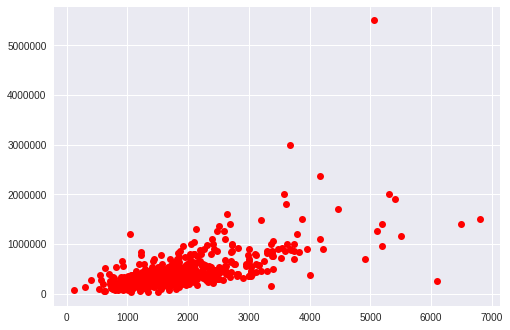

In [0]:
# only get the Size and the Price features
Xs = housing_data[['Size']]
Ys = housing_data[['Price']]
print("Size shape:", Xs.shape)
print("Price shape:", Ys.shape)
dataset_size = Xs.shape[0]
print("Size:", dataset_size)

# plot the price and the size
plt.plot(Xs, Ys, 'ro')

### Normalization

In [0]:
Xs = Xs.values
Ys = Ys.values

# Normalize the input features# Norma 
max_size = np.max(Xs)
min_size = np.min(Xs)
max_price = np.max(Ys)
min_price = np.min(Ys)

Xs = (Xs - min_size) / (max_size - min_size)
Ys = (Ys - min_price) / (max_price - min_price)

# shuffle the dataset before separating test/train sets
p = np.random.permutation(len(Xs))
Xs = Xs[p]
Ys = Ys[p]

### Cross validation

Text(0,0.5,'Price')

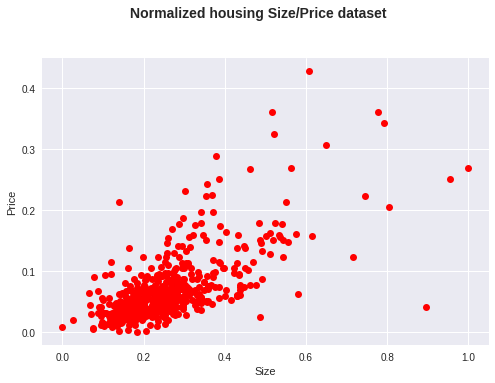

In [0]:
# separate train/test sets 
# Use 80% for training and 20% for testing
train_size = int(0.8 * dataset_size)
Xs_train = Xs[0:train_size]
Xs_test = Xs[train_size:]
Ys_train = Ys[0:train_size]
Ys_test = Ys[train_size:]

min_x = np.min(Xs_train)
max_x = np.max(Xs_train)

# plot the price and the size
fig = plt.figure()
fig.suptitle('Normalized housing Size/Price dataset', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.plot(Xs_train, Ys_train, 'ro')
ax.set_xlabel('Size')
ax.set_ylabel('Price')

### Placeholders and Variables

#### Exercise:

1. Use [tf.placeholder()](https://www.tensorflow.org/api_docs/python/tf/placeholder) to build the two placeholders necessary for feeding the housing data into the Tensorflow Model.
2. Use [tf.Variable()](https://www.tensorflow.org/api_docs/python/tf/Variable) to craete the two necessary variables for a Linear Model - *Hint: slop and y-intercept*

In [0]:
inputs = tf.placeholder(shape=[None,1], dtype=tf.float32, name="inputs")
labels = tf.placeholder(dtype=tf.float32, name="labels")
print(inputs)
print(labels)

Tensor("inputs_1:0", shape=(?, 1), dtype=float32)
Tensor("labels_1:0", dtype=float32)


In [0]:
y_intercept = tf.Variable(tf.random_normal(shape=[1], mean=0, stddev=0.02), name="y-intercept")
slope = tf.Variable(tf.random_normal(shape=[1,1], mean=0, stddev=0.02), name="slope")
print(y_intercept)
print(slope)

<tf.Variable 'y-intercept_1:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'slope_1:0' shape=(1, 1) dtype=float32_ref>


### Building the Model

**Exercise**

1- Build a linear model following the equation bellow.

![alt text](https://cdn-images-1.medium.com/max/800/1*SuNmDkv0qNJbKGZoEoGBmw.png)

In [0]:
def model(X):
  return tf.matmul(X,slope) + y_intercept
predictions = model(inputs)

### Hyper-parameters

#### Exercise:
1. Tune the hyper-parameters

In [0]:
# defines the size of the step we want to perform in the direction of the gradient# define 
lr = 0.3
batch_size = 96
total_epochs = 25

![alt text](https://cdn-images-1.medium.com/max/800/1*GQ6vjZ9j0K5V7BReHywWAA.png)

### Loss Function and Convex Optimization

- The loss function, also called the objective, is a method for evaluating how good our model is. Remember, the goal of any ML algorithm is to make the loss as low as possible.
- The optimization function is responsible for minimizing the loss. It does it using Gradient Descent. Basically at each time steps, the it computes the Gradient of the loss function (MSE) with respect to the Weights (slop and bias) and take a step in the opposite direction of this gradient.

#### Exercise:

1. Use [tf.losses.mean_squared_error()](https://www.tensorflow.org/api_docs/python/tf/losses/mean_squared_error) to compute the loss between the prediction values and the true (target) values.
2. Use [tf.train.GradientDescentOptimizer()](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer) to compute the Gradients and minimize the loss function.

In [0]:
loss = tf.losses.mean_squared_error(
    labels=labels,
    predictions=predictions)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)

![alt text](https://cdn-images-1.medium.com/max/800/1*J-TbI94E1nXNHIubJc7VeQ.png)

In [0]:
## DO NOT CHANGE
def next_batch(Xs, Ys, batch_size=64):
    p = np.random.permutation(len(Xs))
    Xs = Xs[p]
    Ys = Ys[p]
    for i in range(0,Xs.shape[0],batch_size):
        x_batch = Xs[i:i+batch_size]
        if x_batch.shape[0] < batch_size:
            continue
        yield np.reshape(x_batch, (batch_size,-1)), Ys[i:i+batch_size]

In [0]:
## DO NOT CHANGE
def eval_and_plot(W0, W1, min_x, max_x, id_):
    min_y = W0 + np.dot(W1, min_x)
    max_y = W0 + np.dot(W1, max_x)

    plt.plot(Xs_train, Ys_train, 'ro')
    plt.plot([min_x, max_x], [min_y.squeeze(), max_y.squeeze()], 'k-', lw=2)
    #plt.savefig("./media/fit%(number)04d.png" % {"number": id_})
    #plt.clf()
    plt.show()

**Exercise:**


1.   Finish the training loop bellow. Make sure you run the *optimizer* Tensor.
2.   Fetch and display the *training* and *generalization* losses.



Epoch: 0 Generalization error: 0.008854917
Epoch: 1 Generalization error: 0.008604389
Epoch: 2 Generalization error: 0.008372608
Epoch: 3 Generalization error: 0.008161256
Epoch: 4 Generalization error: 0.007992199
Epoch: 5 Generalization error: 0.007806665
Epoch: 6 Generalization error: 0.007649894
Epoch: 7 Generalization error: 0.0074950615
Epoch: 8 Generalization error: 0.007376825
Epoch: 9 Generalization error: 0.007300561
Epoch: 10 Generalization error: 0.0071328827
Epoch: 11 Generalization error: 0.007014633
Epoch: 12 Generalization error: 0.0069648246
Epoch: 13 Generalization error: 0.0068598157
Epoch: 14 Generalization error: 0.0067797867
Epoch: 15 Generalization error: 0.00670243
Epoch: 16 Generalization error: 0.0066599734
Epoch: 17 Generalization error: 0.006535943
Epoch: 18 Generalization error: 0.0065309294
Epoch: 19 Generalization error: 0.0064614653
Epoch: 20 Generalization error: 0.0064428765
Epoch: 21 Generalization error: 0.00628347
Epoch: 22 Generalization error: 0.0

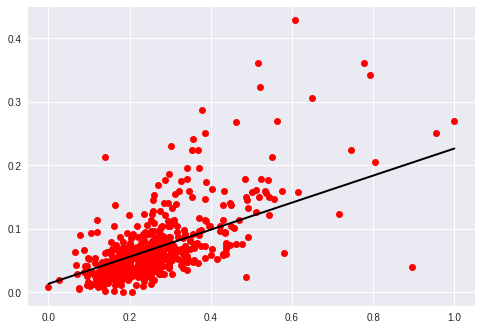

In [0]:
training_loss = []
generalization_loss =[]

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  for epoch in range(total_epochs):
  
    for X_batch, y_batch in next_batch(Xs_train, Ys_train, batch_size):
      _, train_loss = sess.run([optimizer, loss], 
                            feed_dict={inputs:X_batch, labels:y_batch})
    training_loss.append(train_loss)
    val_pred, val_loss, m, y = sess.run([predictions, loss, slope, y_intercept], 
                                  feed_dict={inputs: Xs_test, labels:Ys_test})
    
    generalization_loss.append(val_loss)
    print("Epoch:", epoch, "Generalization error:", val_loss)
    
eval_and_plot(y,m,min_x,max_x,epoch)

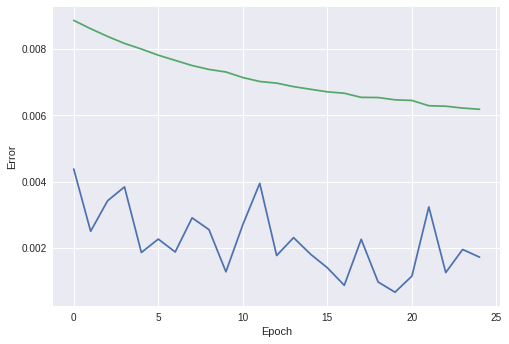

In [0]:
# plot the price and the size
plt.plot(training_loss, label="validation")
plt.plot(generalization_loss, label="training")
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()